# **KLASSIFIKASI PENYAKIT DAUN PADI**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## **Import Library yang Dibutuhkan**

In [ ]:
from IPython.display import clear_output
!pip install imutils
clear_output()

In [ ]:
!pip install --upgrade tensorflow==2.13.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.7 MB/s eta 0:00:00


In [ ]:
!pip install scikit-image

In [ ]:
# Excell writer
_ = ! pip install xlsxwriter

In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import glob
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from sklearn.metrics import accuracy_score
from datetime import datetime

import os
import shutil
import itertools
import imutils
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from pathlib import Path
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from keras.utils import save_img
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

from keras import layers, Model
from keras.applications import ResNet101
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras import regularizers
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization, GlobalAveragePooling2D

## **Undersampling Data**

Jumlah data akan disamakan dengan jumlah data paling sedikit yaitu kelas *BrownSpot* yang memiliki jumlah data 523

Selisih tiap kelas dengan BrownSpot

*   Hispa : 565 - 523 = 42
*   Healthy : 1448 - 523 = 965
*   LeafBlast : 779 - 523 = 256





In [ ]:
# path = '/content/drive/MyDrive/SKRIPSI/RiceLeafs/Hispa'# Path data dari kelas Hispa
# n = 42 # Jumlah data gambar acak yang akan dihapus
# img_names = os.listdir(path)  # Mengambil nama gabar
# img_names = random.sample(img_names, n)  # Memilih gambar yang akan dihapus sebanyak n
# for image in img_names:  # Gambar-gambar yang akan dihapus
#     f = os.path.join(path, image)
#     os.remove(f)  # Menghapus gambar

In [ ]:
# path = '/content/drive/MyDrive/SKRIPSI/RiceLeafs/Healthy'# Path data dari kelas Healthy
# n = 965 # Jumlah data gambar acak yang akan dihapus
# img_names = os.listdir(path)  # Mengambil nama gabar
# img_names = random.sample(img_names, n)  # Memilih gambar yang akan dihapus sebanyak n
# for image in img_names:  # Gambar-gambar yang akan dihapus
#     f = os.path.join(path, image)
#     os.remove(f)  # Menghapus gambar

In [ ]:
path = '/content/drive/MyDrive/SKRIPSI/RiceLeafs/LeafBlast'# Path data dari kelas LeafBlast
n = 256 # Jumlah data gambar acak yang akan dihapus
img_names = os.listdir(path)  # Mengambil nama gabar
img_names = random.sample(img_names, n)  # Memilih gambar yang akan dihapus sebanyak n
for image in img_names:  # Gambar-gambar yang akan dihapus
    f = os.path.join(path, image)
    os.remove(f)  # Menghapus gambar

In [ ]:
PATH = "/content/drive/MyDrive/SKRIPSI/RiceLeafs"
def getAllFilespath(PATH):
    BrownSpot_filespath = []
    Healthy_filespath = []
    Hispa_filespath = []
    LeafBlast_filespath = []

    for root, dirs, files in os.walk(PATH):
        if Path(root).name == "BrownSpot":
            root_images = os.path.join(root)  # MENGAMBIL ROOT FOLDER SAMPAI KE FILE
            image_filenames = os.listdir(root)  # Mengambil semua nama gambar
            # Mengambil satu-satu tempat penyimpanan file dan dimasukkan ke array
            for image_filename in image_filenames:
                path_file = os.path.join(root_images, image_filename)
                BrownSpot_filespath.append(path_file)
        elif Path(root).name == "Healthy":
            root_images = os.path.join(root)
            image_filenames = os.listdir(root)
            for image_filename in image_filenames:
                path_file = os.path.join(root_images, image_filename)
                Healthy_filespath.append(path_file)
        elif Path(root).name == "Hispa":
            root_images = os.path.join(root)
            image_filenames = os.listdir(root)
            for image_filename in image_filenames:
                path_file = os.path.join(root_images, image_filename)
                Hispa_filespath.append(path_file)
        elif Path(root).name == "LeafBlast":
            root_images = os.path.join(root)
            image_filenames = os.listdir(root)
            for image_filename in image_filenames:
                path_file = os.path.join(root_images, image_filename)
                LeafBlast_filespath.append(path_file)

    return BrownSpot_filespath, Healthy_filespath, Hispa_filespath,LeafBlast_filespath

In [ ]:
BrownSpot_filespath, Healthy_filespath, Hispa_filespath, LeafBlast_filespath = getAllFilespath(PATH)
print("Total citra BrownSpot : ", len(BrownSpot_filespath))
print("Total citra Healthy : ", len(Healthy_filespath))
print("Total citra Hispa : ", len(Hispa_filespath))
print("Total citra LeafBlast : ", len(LeafBlast_filespath))

Total citra BrownSpot :  523
Total citra Healthy :  523
Total citra Hispa :  523
Total citra LeafBlast :  523


## **Load Data**

In [ ]:
data = '/content/drive/MyDrive/SKRIPSI/RiceLeafs'
classes=[]
for file in os.listdir(data):
    classes+=[file]
print(classes)
print(len(classes))

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']
4


In [ ]:
brownspot = [data + '/BrownSpot/' + img for img in os.listdir(data + '/BrownSpot')[:3]]
Healthy = [data  + '/Healthy/' + img for img in os.listdir(data + '/Healthy')[:3]]
Hispa = [data  + '/Hispa/' + img for img in os.listdir(data + '/Hispa')[:3]]
LeafBlast = [data  + '/LeafBlast/' + img for img in os.listdir(data + '/LeafBlast')[:3]]

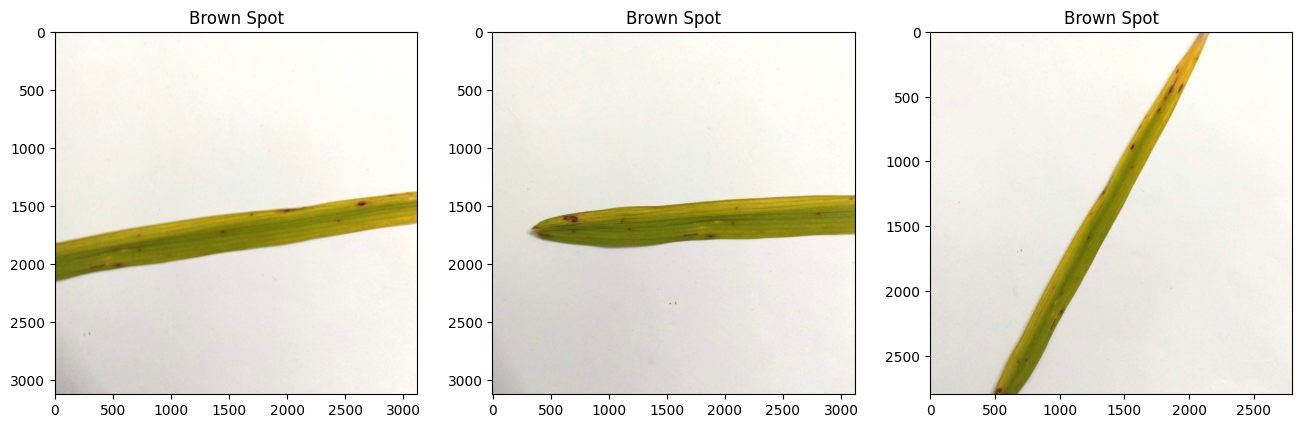

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

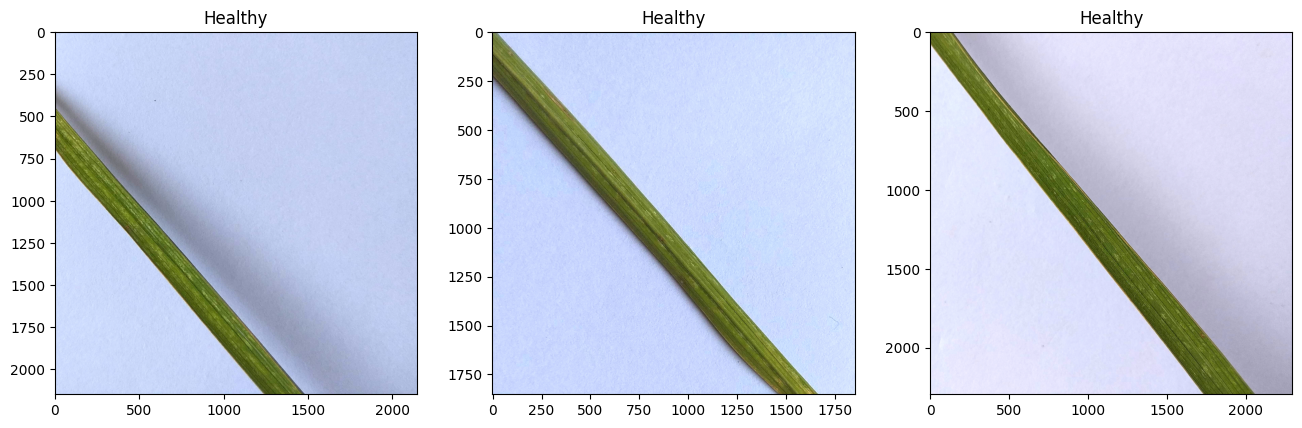

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(Healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

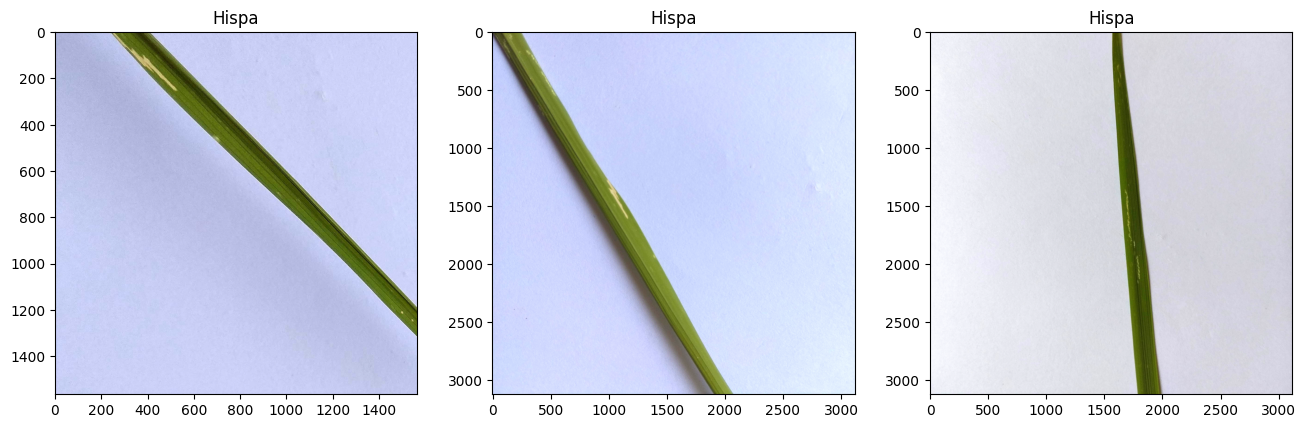

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(Hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

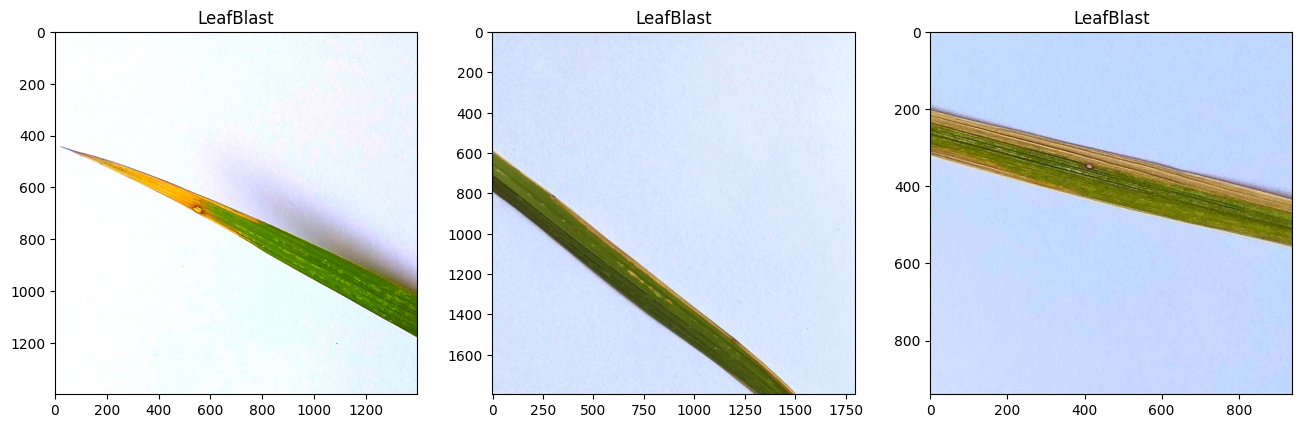

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(LeafBlast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("LeafBlast")

## **Menyimpan Path data dan kelasnya kedalam Dataframe**

In [ ]:
data_dir = "/content/drive/MyDrive/SKRIPSI/RiceLeafs"

filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Menggabungkan path data dan labelnya ke dalam satu file dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
df

,filepaths,labels
0,/content/drive/MyDrive/SKRIPSI/RiceLeafs/Brown...,BrownSpot
1,/content/drive/MyDrive/SKRIPSI/RiceLeafs/Brown...,BrownSpot
2,/content/drive/MyDrive/SKRIPSI/RiceLeafs/Brown...,BrownSpot
3,/content/drive/MyDrive/SKRIPSI/RiceLeafs/Brown...,BrownSpot
4,/content/drive/MyDrive/SKRIPSI/RiceLeafs/Brown...,BrownSpot
...,...,...
2087,/content/drive/MyDrive/SKRIPSI/RiceLeafs/LeafB...,LeafBlast
2088,/content/drive/MyDrive/SKRIPSI/RiceLeafs/LeafB...,LeafBlast
2089,/content/drive/MyDrive/SKRIPSI/RiceLeafs/LeafB...,LeafBlast
2090,/content/drive/MyDrive/SKRIPSI/RiceLeafs/LeafB...,LeafBlast


## **Membagi data kedalam data train, validasi dan test**

In [ ]:
# dataframe train
train_valid, test_df = train_test_split(df,  train_size= 0.9, shuffle= True, random_state= 123)

# valid and test dataframe
train_df, valid_df = train_test_split(train_valid,  train_size= 0.8, shuffle= True, random_state= 123)

## Segmentasi Gambar

In [ ]:
import cv2
import numpy as np

# Read the original image
IMAGES_FOLDER = df.loc[0]['filepaths']
original_image = cv2.imread(str(IMAGES_FOLDER))

# Define boundary rectangle containing the foreground object
height, width, _ = original_image.shape
left_margin_proportion = 0.3
right_margin_proportion = 0.3
up_margin_proportion = 0.1
down_margin_proportion = 0.1

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)

# Set the seed for reproducibility purposes
cv2.setRNGSeed(0)


# Binarize input image
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)


binarized_image = cv2.adaptiveThreshold(
    gray_image,
    maxValue=1,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=9,
    C=7,
)

# Initialize the mask with known information
mask = np.zeros((height, width), np.uint8)
mask[:] = cv2.GC_PR_BGD
mask[binarized_image == 0] = cv2.GC_FGD

# Arrays used by the algorithm internally
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)

number_of_iterations = 5

cv2.grabCut(
    original_image,
    mask,
    boundary_rectangle,
    background_model,
    foreground_model,
    number_of_iterations,
    cv2.GC_INIT_WITH_MASK,
)

grabcut_mask = np.where((mask == cv2.GC_PR_BGD) | (mask == cv2.GC_BGD), 0, 1).astype(
    "uint8"
)

segmented_image = original_image.copy() * grabcut_mask[:, :, np.newaxis]

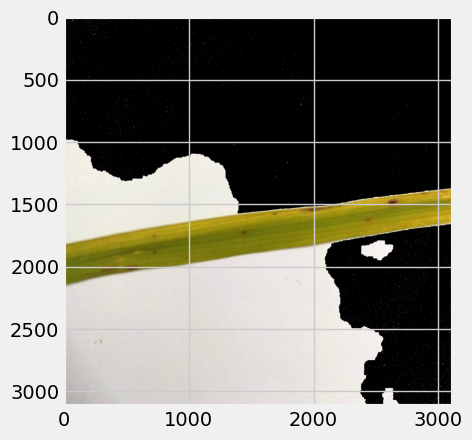

In [ ]:
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()

## **Membuat Image Data Generator**

In [ ]:
# Ubah ukuran gambar menjadi 224*224
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Fungsi untuk cunstom batch size pada data test, bisa juga menggunakan normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# Fungsi ini akan digunakan untuk augmentasi gambar, saat ini hanya mengambil dan mengembalikan gambar
def scalar(img):
    return img

tr_gen = ImageDataGenerator(rotation_range=30,
                            horizontal_flip=True,
                            zoom_range=0.4,
                            fill_mode='nearest')
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: kita akan menggunakan custom test_batch_size, dan menggunakan shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 1505 validated image filenames belonging to 4 classes.
Found 377 validated image filenames belonging to 4 classes.
Found 210 validated image filenames belonging to 4 classes.


## **Membuat Model**

In [ ]:
# # Create Model Structure
# img_size = (224, 224)
# channels = 3
# img_shape = (img_size[0], img_size[1], channels)
# class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# # create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# # we will use efficientnetb3 from EfficientNet family.
# base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# # base_model.trainable = False

# model = Sequential([
#     base_model,
#     BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
#     Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
#                 bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
#     Dropout(rate= 0.45, seed= 123),
#     Dense(class_count, activation= 'softmax')
# ])

# model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

# model.summary()

In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # digunakan untuk mendefinisikan jumlah kelas pada dense layer output

base_model = ResNet101(input_shape=img_shape, weights='imagenet', include_top=False, pooling= 'max')
base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

# x = base_model.output
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.7)(x)
# x = Dropout(0.7)(x)
# x = Dense(64,activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.3)(x)
# x = Dropout(0.3)(x)
# outputs = Dense(class_count, activation="softmax", name="pred")(x)
# model = Model(base_model.input, outputs, name="ResNet101")

# optimizer = Adam(learning_rate=0.001)
# model.compile(
#     optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
# )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 43191940 (164.76 MB)
Trainable params: 529668 (2.02 MB)
Non-trainable params: 42662272 (162.74 MB)
_______

## **Melatih Model**

In [ ]:
es = EarlyStopping(
        monitor='val_accuracy',
        min_delta=0,
        patience=5,
        verbose=1,
        mode='auto',
    )

save_path = '/content/drive/MyDrive/SKRIPSI/SaveModel/check.hdf5'
checkpoint = ModelCheckpoint(save_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callback_list = [es, checkpoint]

In [ ]:
batch_size = 32  # tentukan batch size untuk training
epochs = 50   # number of all epochs in training

history = model.fit(x= train_gen, batch_size=batch_size, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    callbacks=callback_list, shuffle= False)

Epoch 1/50
95/95 [==============================] - ETA: 0s - loss: 8.5749 - accuracy: 0.4346

95/95 [==============================] - 1165s 12s/step - loss: 8.5749 - accuracy: 0.4346 - val_loss: 7.2771 - val_accuracy: 0.5252
Epoch 2/50
95/95 [==============================] - ETA: 0s - loss: 6.0694 - accuracy: 0.4890

95/95 [==============================] - 120s 1s/step - loss: 6.0694 - accuracy: 0.4890 - val_loss: 5.1199 - val_accuracy: 0.5305
Epoch 3/50
95/95 [==============================] - ETA: 0s - loss: 4.3257 - accuracy: 0.5229

95/95 [==============================] - 120s 1s/step - loss: 4.3257 - accuracy: 0.5229 - val_loss: 3.7312 - val_accuracy: 0.5332
Epoch 4/50
95/95 [==============================] - ETA: 0s - loss: 3.2803 - accuracy: 0.5468

95/95 [==============================] - 121s 1s/step - loss: 3.2803 - accuracy: 0.5468 - val_loss: 2.8570 - val_accuracy: 0.5836
Epoch 5/50
94/95 [============================>.] - ETA: 1s - loss: 2.5803 - accuracy: 0.5239

95/95 [==============================] - 123s 1s/step - loss: 2.5803 - accuracy: 0.5236 - val_loss: 2.3088 - val_accuracy: 0.5570
Epoch 6/50
94/95 [============================>.] - ETA: 1s - loss: 2.1837 - accuracy: 0.5299

95/95 [==============================] - 119s 1s/step - loss: 2.1837 - accuracy: 0.5296 - val_loss: 2.0160 - val_accuracy: 0.5676
Epoch 7/50
94/95 [============================>.] - ETA: 1s - loss: 1.9515 - accuracy: 0.5199

95/95 [==============================] - 120s 1s/step - loss: 1.9516 - accuracy: 0.5196 - val_loss: 1.8322 - val_accuracy: 0.5942
Epoch 8/50
95/95 [==============================] - ETA: 0s - loss: 1.7952 - accuracy: 0.5362

95/95 [==============================] - 117s 1s/step - loss: 1.7952 - accuracy: 0.5362 - val_loss: 1.7074 - val_accuracy: 0.5544
Epoch 9/50
94/95 [============================>.] - ETA: 1s - loss: 1.7314 - accuracy: 0.5146

95/95 [==============================] - 119s 1s/step - loss: 1.7315 - accuracy: 0.5150 - val_loss: 1.6407 - val_accuracy: 0.5570
Epoch 10/50
94/95 [============================>.] - ETA: 1s - loss: 1.6771 - accuracy: 0.5332

95/95 [==============================] - 121s 1s/step - loss: 1.6772 - accuracy: 0.5336 - val_loss: 1.6699 - val_accuracy: 0.5703
Epoch 11/50
94/95 [============================>.] - ETA: 1s - loss: 1.6729 - accuracy: 0.5133

95/95 [==============================] - 116s 1s/step - loss: 1.6730 - accuracy: 0.5136 - val_loss: 1.5977 - val_accuracy: 0.5836
Epoch 12/50
95/95 [==============================] - ETA: 0s - loss: 1.6229 - accuracy: 0.5056

95/95 [==============================] - 121s 1s/step - loss: 1.6229 - accuracy: 0.5056 - val_loss: 1.5558 - val_accuracy: 0.5676
Epoch 12: early stopping


## **Kinerja Model**

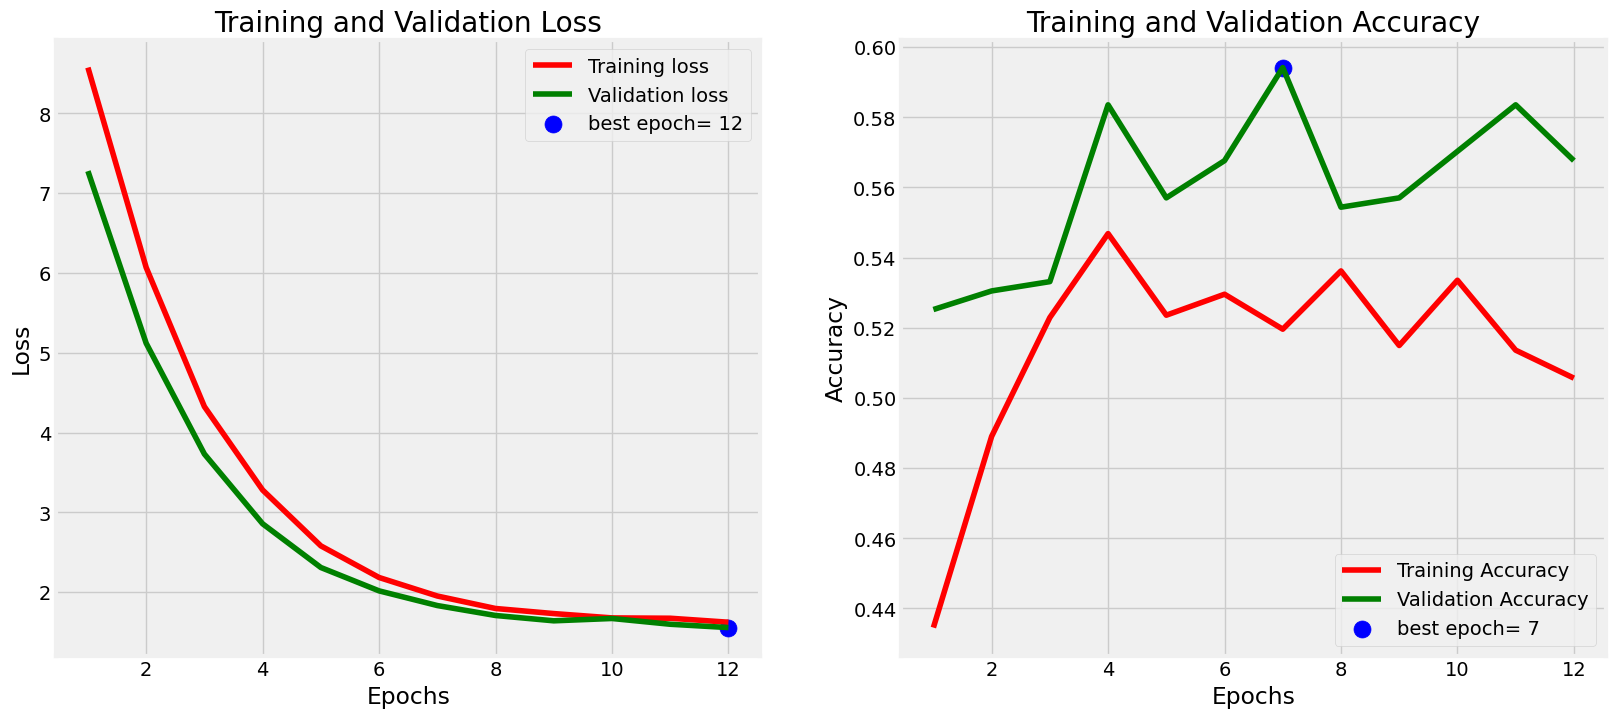

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
p

## **Evaluasi Model**

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

3/3 [==============================] - 101s 48s/step - loss: 1.5322 - accuracy: 0.5619
Train Loss:  1.4397802352905273
Train Accuracy:  0.625
--------------------
Validation Loss:  1.6025595664978027
Validation Accuracy:  0.5833333134651184
--------------------
Test Loss:  1.5322227478027344
Test Accuracy:  0.561904788017273


## **PREDIKSI**

In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

3/3 [==============================] - 11s 4s/step


## **Confusion matrix report**

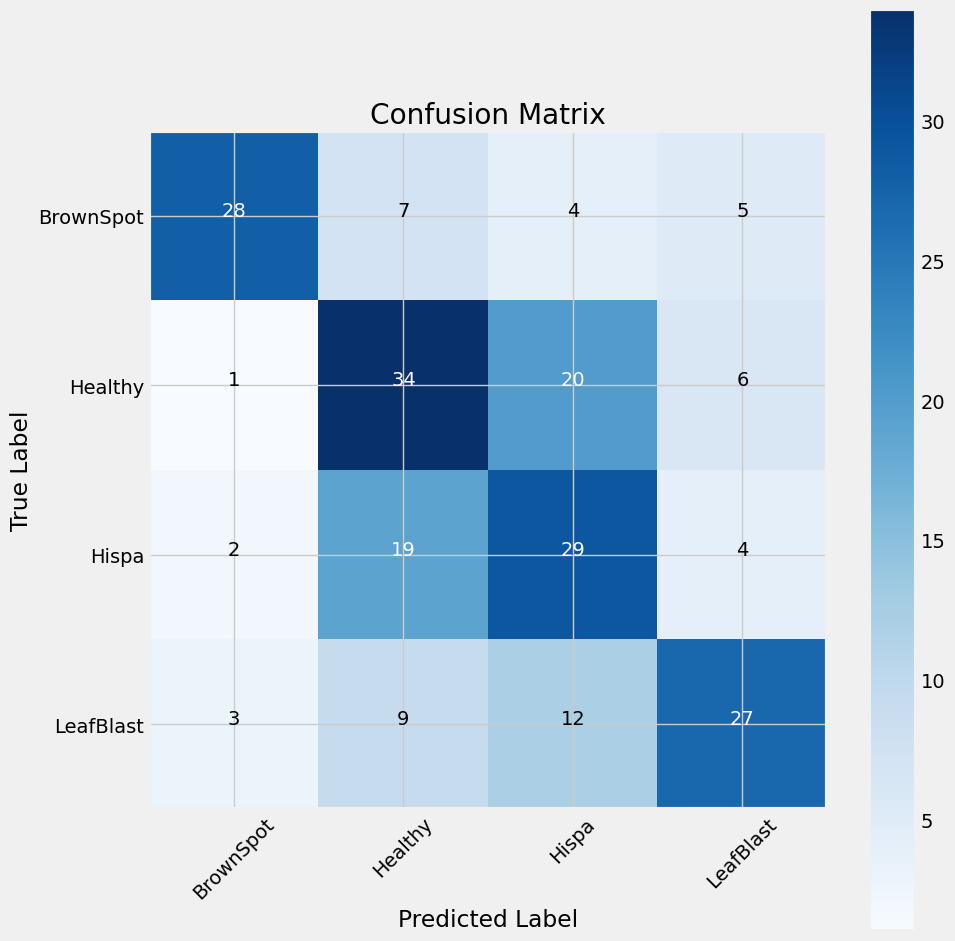

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

   BrownSpot       0.82      0.64      0.72        44
     Healthy       0.49      0.56      0.52        61
       Hispa       0.45      0.54      0.49        54
   LeafBlast       0.64      0.53      0.58        51

    accuracy                           0.56       210
   macro avg       0.60      0.57      0.58       210
weighted avg       0.59      0.56      0.57       210



## **Menyimpan model**

In [ ]:
%cd /content/drive/MyDrive/SKRIPSI/SaveModel

/content/drive/MyDrive/SKRIPSI/SaveModel


In [ ]:
model_name = model.input_names[0][:-6]
subject = 'RiceLeafDiseases'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model telah disimpan di {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights telah disimpan sebagai {weights_save_loc}')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model telah disimpan di resnet101-RiceLeafDiseases-56.19.h5
weights telah disimpan sebagai resnet101-RiceLeafDiseases-weights.h5


## **Menyimpan file dataframe kedalam csv**

In [ ]:
class_dict = train_gen.class_indices
img_size = train_gen.image_shape
height = []
width = []
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

Index_series = pd.Series(list(class_dict.values()), name= 'class_index')
Class_series = pd.Series(list(class_dict.keys()), name= 'class')
Height_series = pd.Series(height, name= 'height')
Width_series = pd.Series(width, name= 'width')
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis= 1)
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index= False)
print(f'file telah disimpan {csv_save_loc}')

file telah disimpan RiceLeafDiseases-class_dict.csv
